<a href="https://colab.research.google.com/github/sharmashubam/pyTorch_basics/blob/main/02_pyTorch_nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
from  torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.0.0+cu118'

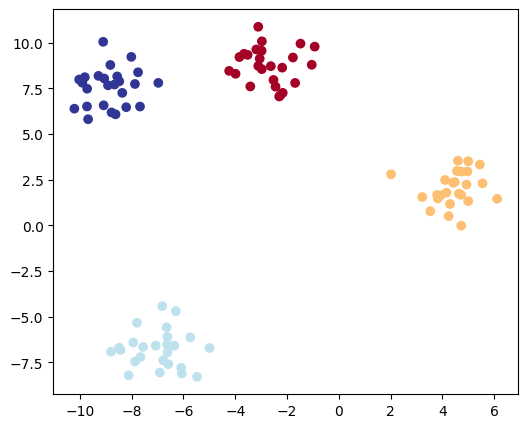

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

NUM_CLASSES= 4
NUM_FEATURES= 2
RANDOM_SEED =42
X,y = make_blobs(n_samples=100, 
                 n_features=NUM_FEATURES 
                 , centers=NUM_CLASSES ,
                 random_state=RANDOM_SEED )

# print(X.shape)

# turning data into tensors
X_blob = torch.tensor(X ,dtype = torch.float)
y_blob = torch.tensor(y, dtype= torch.long)

# y_blob.dtype


# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)



# 4. Plot data
plt.figure(figsize=(6, 5))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);



In [24]:
# Create device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [29]:
from torch import nn

class BlobModel(nn.Module):
  def __init__ (self, input_features, output_features,hidden_units =8):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Linear(in_features= input_features, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features= output_features)
    )

  def forward(self ,x):
    return self.linear_stack(x)



model = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model

BlobModel(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [31]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [38]:
# 
y_logits = model(X_blob_test.to(device))
y_logits[:1]

y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:1]

tensor([[0.1065, 0.1776, 0.1281, 0.5878]], grad_fn=<SliceBackward0>)

In [46]:
def accuracy_fn(y_pred,y_true):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [51]:
# fitting the mode;
torch.manual_seed(42)
epochs= 100

# set data to transfer target device

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  # lets go in training mode 
  model.train()

  # forward pass
  y_logits = model(X_blob_train)
  y_pred= torch.softmax(y_logits, dim=1).argmax(dim=1)

  # calculate the loss

  loss = loss_fn(y_logits, y_blob_train)
  acc= accuracy_fn(y_pred =y_pred,y_true= y_blob_train )

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()
  
  # 5. Optimizer step
  optimizer.step()

  # lets test 
  model.eval()
  with torch.inference_mode() :
    # 1. Forward pass
    test_logits = model(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Calculate test loss and accuracy
    test_loss = loss_fn(test_logits, y_blob_test)

    test_acc = accuracy_fn(y_pred=test_pred,
                        y_true =y_blob_test)
    
    
  if epoch % 5 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.00036, Acc: 100.00% | Test Loss: 0.00035, Test Acc: 100.00%
Epoch: 5 | Loss: 0.00035, Acc: 100.00% | Test Loss: 0.00035, Test Acc: 100.00%
Epoch: 10 | Loss: 0.00035, Acc: 100.00% | Test Loss: 0.00035, Test Acc: 100.00%
Epoch: 15 | Loss: 0.00035, Acc: 100.00% | Test Loss: 0.00035, Test Acc: 100.00%
Epoch: 20 | Loss: 0.00035, Acc: 100.00% | Test Loss: 0.00034, Test Acc: 100.00%
Epoch: 25 | Loss: 0.00035, Acc: 100.00% | Test Loss: 0.00034, Test Acc: 100.00%
Epoch: 30 | Loss: 0.00035, Acc: 100.00% | Test Loss: 0.00034, Test Acc: 100.00%
Epoch: 35 | Loss: 0.00034, Acc: 100.00% | Test Loss: 0.00034, Test Acc: 100.00%
Epoch: 40 | Loss: 0.00034, Acc: 100.00% | Test Loss: 0.00034, Test Acc: 100.00%
Epoch: 45 | Loss: 0.00034, Acc: 100.00% | Test Loss: 0.00034, Test Acc: 100.00%
Epoch: 50 | Loss: 0.00034, Acc: 100.00% | Test Loss: 0.00034, Test Acc: 100.00%
Epoch: 55 | Loss: 0.00034, Acc: 100.00% | Test Loss: 0.00033, Test Acc: 100.00%
Epoch: 60 | Loss: 0.00034, Acc: 100.00% | 

In [56]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


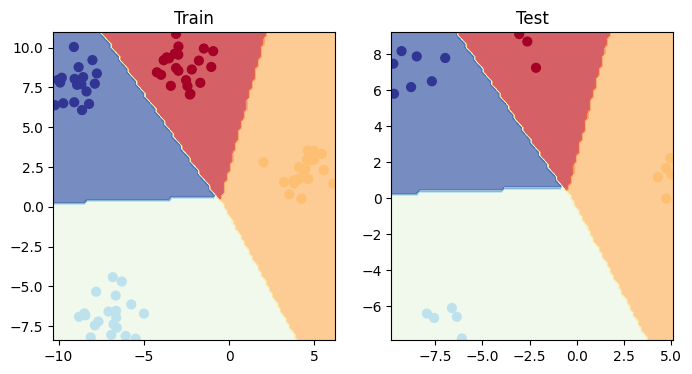

In [59]:


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)
